<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np 
import pandas as pd

In [2]:
data=pd.read_excel('anova_lab_data.xlsx', sheet_name='data_collected')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Power         15 non-null     object 
 1   Etching Rate  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [4]:
data.columns

Index(['Power ', 'Etching Rate'], dtype='object')

In [5]:
data['Power '].unique()

array(['160 W', '180 W', '200 W'], dtype=object)

In [6]:
data=data.rename(columns= {'Power ':'power'})

In [11]:
data=data.rename(columns= {'Etching Rate':'etching_rate'})

In [13]:
data.head()

,power,etching_rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
model=ols('etching_rate ~ C(power)', data=data).fit() # C is compare and '~' difference.

In [16]:
results_table = sm.stats.anova_lm(model)

In [17]:
results_table

,df,sum_sq,mean_sq,F,PR(>F)
C(power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


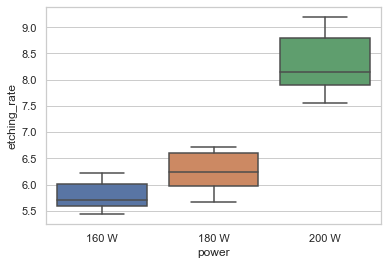

In [21]:
 import seaborn as sns
ax = sns.boxplot(x="power", y="etching_rate", data=data)

State the null hypothesis
State the alternate hypothesis
What is the significance level
What are the degrees of freedom of model, error terms, and total DoF

Null Hyphotesis: All the power systems result in the same etching rate (B0=B1=B2, NULL HYPHOTESIS)
Alternate hyphothesis: At least one of the three is different.
Significance level: 95%
Degrees of freedom: Number of observations that can vary freely inside in the data. So if we have 10 observations, we can choose 9 variables in a free way but that last value is not free of choosing. That's why the degrees of freedom is always the number of observations -1.
Error terms: Term that shows the amount of the independent variable that the model does not explain. 
Total Dof: 5-1=2 